# Ford GoBike System Data


## by Sarita Machado


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [29]:
data_files = ['C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201801-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201802-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201803-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201804-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201805-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201806-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201807-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201808-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201809-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201810-fordgobike-tripdata.csv',
              'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201811-fordgobike-tripdata.csv',
               'C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data/201812-fordgobike-tripdata.csv']

In [30]:
bike_data = pd.concat([pd.read_csv(f,) for f in glob.glob("C:/Users/sarita.machado/Downloads/New folder/Data Visualisation/Trip Data" + "/*.csv")],ignore_index=True)

In [31]:
#Checking if the data is correctly imported
bike_data.head()
bike_data.shape
bike_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### What is the structure of your dataset?

> My Data set contains trip data of users in San Francisco Bay Area with fields as :-
Trip Duration (seconds),Start Time and Date,End Time and Date,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual),Member Year of Birth,Member Gender
> There are 1863721 records of trip in the dataset. Most variables are numeric in nature, but the variables user_type,station names are cateogrical in nature

### What is/are the main feature(s) of interest in your dataset?

>  I am interested in figuring out the factors which influence the trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. Trip Duration
> 2. User Type 
> 3. Start Date and End Date


## Data Wrangling

> In this section, I would like to do some data wrangling steps before getting started with the exploration
> 1. Convert the duration in seconds to hours
> 2. Delete bike share for all trip column
> 3. Delete values where the station id is null
> 4. Convert the end and start station id to int
> 5. Segregate the start_time into indvidual fields like start_date and start_time
> 6. Segregate the end_time into indvidual fields like end_date and end_time
> 7. Extract day and month from start date, end date 

#### 1. Convert the duration in seconds to hours

In [32]:
bike_data['duration_min']=bike_data['duration_sec']/60
bike_data['duration_hr']=bike_data['duration_min']/60
bike_data['duration_min']=bike_data['duration_min'].astype(float)
bike_data['duration_hr']=bike_data['duration_hr'].astype(float)
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.733333,20.912222
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,1423.700000,23.728333
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.933333,19.882222
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,1017.933333,16.965556
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.100000,11.101667


#### 2. Delete bike share for all trip column

In [33]:
bike_data.drop(columns='bike_share_for_all_trip',inplace=True,axis=1)

#### 3. Delete values where the station id is null

In [34]:
#bike_data['start_station_id']=bike_data['start_station_id'].astype(int)
bike_data[bike_data['start_station_id'].isna()]
bike_data.dropna(subset=['start_station_id'],inplace=True)

#### 4. Convert the end and start station id to int

In [35]:
bike_data['start_station_id']=bike_data['start_station_id'].astype(int)
bike_data['end_station_id']=bike_data['end_station_id'].astype(int)

#### 5. Segregate the start_time into indvidual fields like start_date and start_time

In [36]:
bike_data['start_date'] = pd.to_datetime(bike_data['start_time']).dt.date
bike_data['start_time'] = pd.to_datetime(bike_data['start_time']).dt.time

#### 6. Segregate the end_time into indvidual fields like end_date and end_time

In [37]:
bike_data['end_date'] = pd.to_datetime(bike_data['end_time']).dt.date
bike_data['end_time'] = pd.to_datetime(bike_data['end_time']).dt.time


#### 7.Extract day and month from start date, end date 

In [38]:
##Assumption made: The day and month in consideration for bike usage is the start date 
bike_data['start_date1'] =  pd.to_datetime(bike_data['start_date'], format='%Y-%m-%d')
bike_data['day'] = bike_data['start_date1'].apply(lambda r:r.day).astype(int)
bike_data['month'] = bike_data['start_date1'].apply(lambda r:r.month).astype(int)
#bike_data.head(2)
bike_data.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,duration_min,duration_hr,start_date,end_date,start_date1,day,month
0,75284,22:52:35.239000,19:47:19.824000,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,1254.733333,20.912222,2018-01-31,2018-02-01,2018-01-31,31,1
1,85422,16:13:34.351000,15:57:17.310000,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,1423.700000,23.728333,2018-01-31,2018-02-01,2018-01-31,31,1


In [39]:
bike_data.head(12)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,duration_min,duration_hr,start_date,end_date,start_date1,day,month
0,75284,22:52:35.239000,19:47:19.824000,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,1254.733333,20.912222,2018-01-31,2018-02-01,2018-01-31,31,1
1,85422,16:13:34.351000,15:57:17.310000,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,1423.700000,23.728333,2018-01-31,2018-02-01,2018-01-31,31,1
2,71576,14:23:55.889000,10:16:52.116000,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,1192.933333,19.882222,2018-01-31,2018-02-01,2018-01-31,31,1
3,61076,14:53:23.562000,07:51:20.500000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,1017.933333,16.965556,2018-01-31,2018-02-01,2018-01-31,31,1
4,39966,19:52:24.667000,06:58:31.053000,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,666.100000,11.101667,2018-01-31,2018-02-01,2018-01-31,31,1
5,6477,22:58:44.867000,00:46:41.908000,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,...,Customer,NaN,NaN,107.950000,1.799167,2018-01-31,2018-02-01,2018-01-31,31,1
6,453,23:53:53.632000,00:01:26.805000,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,7.550000,0.125833,2018-01-31,2018-02-01,2018-01-31,31,1
7,180,23:52:09.903000,23:55:10.807000,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980.0,Male,3.000000,0.050000,2018-01-31,2018-01-31,2018-01-31,31,1
8,996,23:34:56.004000,23:51:32.674000,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,...,Subscriber,1987.0,Male,16.600000,0.276667,2018-01-31,2018-01-31,2018-01-31,31,1
9,825,23:34:14.027000,23:47:59.809000,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,...,Subscriber,1994.0,Female,13.750000,0.229167,2018-01-31,2018-01-31,2018-01-31,31,1


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [40]:
bike_data.duration_hr.describe()

count    1.851950e+06
mean     2.369443e-01
std      6.498473e-01
min      1.694444e-02
25%      9.722222e-02
50%      1.541667e-01
75%      2.416667e-01
max      2.399056e+01
Name: duration_hr, dtype: float64

### Exploring the Time spent on the bike in Hours

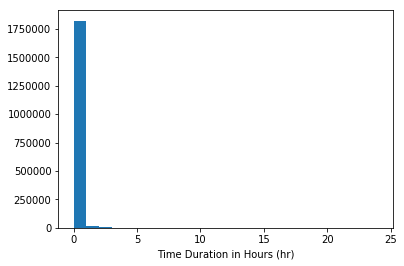

In [41]:
bins = np.arange(0, bike_data['duration_hr'].max()+1, 1)
plt.hist(data = bike_data, x = 'duration_hr', bins = bins)
plt.xlabel('Time Duration in Hours (hr)')
plt.show()

#### This hist plot indicates we have outliers since we have values greater 3 hours on the x-axis.These values are not seen on the histplot.The code in the next slide shows the outliers present

In [42]:
low_outliers = (bike_data['duration_hr'] >3)
bike_data.loc[low_outliers]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,duration_min,duration_hr,start_date,end_date,start_date1,day,month
0,75284,22:52:35.239000,19:47:19.824000,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,1254.733333,20.912222,2018-01-31,2018-02-01,2018-01-31,31,1
1,85422,16:13:34.351000,15:57:17.310000,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,1423.700000,23.728333,2018-01-31,2018-02-01,2018-01-31,31,1
2,71576,14:23:55.889000,10:16:52.116000,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,1192.933333,19.882222,2018-01-31,2018-02-01,2018-01-31,31,1
3,61076,14:53:23.562000,07:51:20.500000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,1017.933333,16.965556,2018-01-31,2018-02-01,2018-01-31,31,1
4,39966,19:52:24.667000,06:58:31.053000,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,666.100000,11.101667,2018-01-31,2018-02-01,2018-01-31,31,1
85,14366,18:09:22.537000,22:08:49.392000,250,North Berkeley BART Station,37.874014,-122.283019,259,Addison St at Fourth St,37.866249,...,Subscriber,1979.0,Male,239.433333,3.990556,2018-01-31,2018-01-31,2018-01-31,31,1
86,12167,18:45:53.099000,22:08:40.150000,64,5th St at Brannan St,37.776754,-122.399018,58,Market St at 10th St,37.776619,...,Customer,1989.0,Male,202.783333,3.379722,2018-01-31,2018-01-31,2018-01-31,31,1
655,20927,13:18:38.739000,19:07:25.778000,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6,The Embarcadero at Sansome St,37.804770,...,Customer,NaN,NaN,348.783333,5.813056,2018-01-31,2018-01-31,2018-01-31,31,1
657,20944,13:18:09.755000,19:07:14.091000,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6,The Embarcadero at Sansome St,37.804770,...,Customer,NaN,NaN,349.066667,5.817778,2018-01-31,2018-01-31,2018-01-31,31,1
746,46259,06:01:40.813000,18:52:39.958000,41,Golden Gate Ave at Polk St,37.781270,-122.418740,5,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,NaN,NaN,770.983333,12.849722,2018-01-31,2018-01-31,2018-01-31,31,1


### Exploring the Time spent on the bike in Minutes

Reached


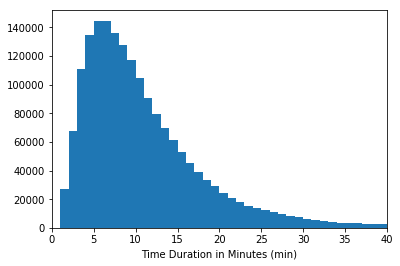

In [43]:
bins = np.arange(0, bike_data['duration_min'].max()+1, 1)
#sb.countplot(data=bike_data,x='duration_hr', color=sb.color_palette()[0])
plt.hist(data = bike_data, x = 'duration_min', bins = bins)
plt.xlim([0,40])
print("Reached")
plt.xlabel('Time Duration in Minutes (min)')
plt.show()

### This slide indicates the data points of subcriber vis-a-vis customer

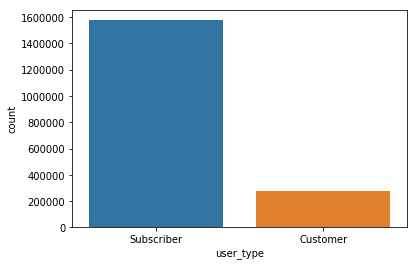

In [44]:
sb.countplot(data=bike_data,x='user_type')


### This slide indicates the data points in a month-wise fashion

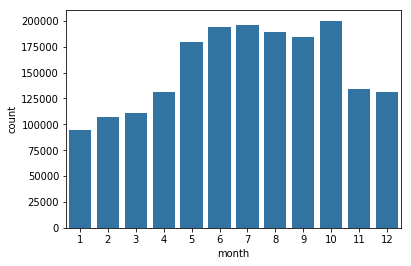

In [45]:
sb.countplot(data=bike_data,x='month', color=sb.color_palette()[0])

### This slide indicates the data points in a day-wise fashion

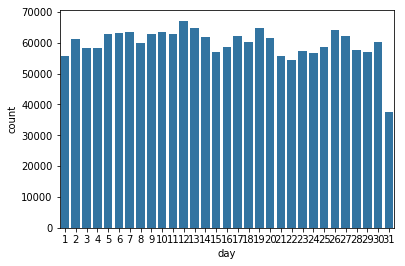

In [46]:
sb.countplot(data=bike_data,x='day', color=sb.color_palette()[0])

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not have to perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I had to tidy the data as well as perform some operations
I did some data erangling on the start_time and end_time to extract date and time. From there I etracted the month and day for the trip data. This was done as I wanted to understand the influence of factors like month and day on the duration that the bike is ridden

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Understanding the relation between the various variables 

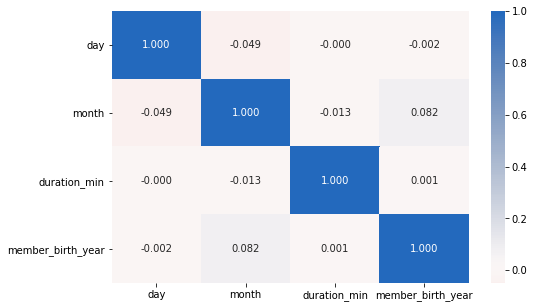

In [47]:
numeric_vars = ['day','month','duration_min','member_birth_year']
plt.figure(figsize = [8, 5])
sb.heatmap(bike_data[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

### Investigating the relation between the user_type(Customer/Subscriber) and the time that the user spends on the bike

<Figure size 720x720 with 0 Axes>

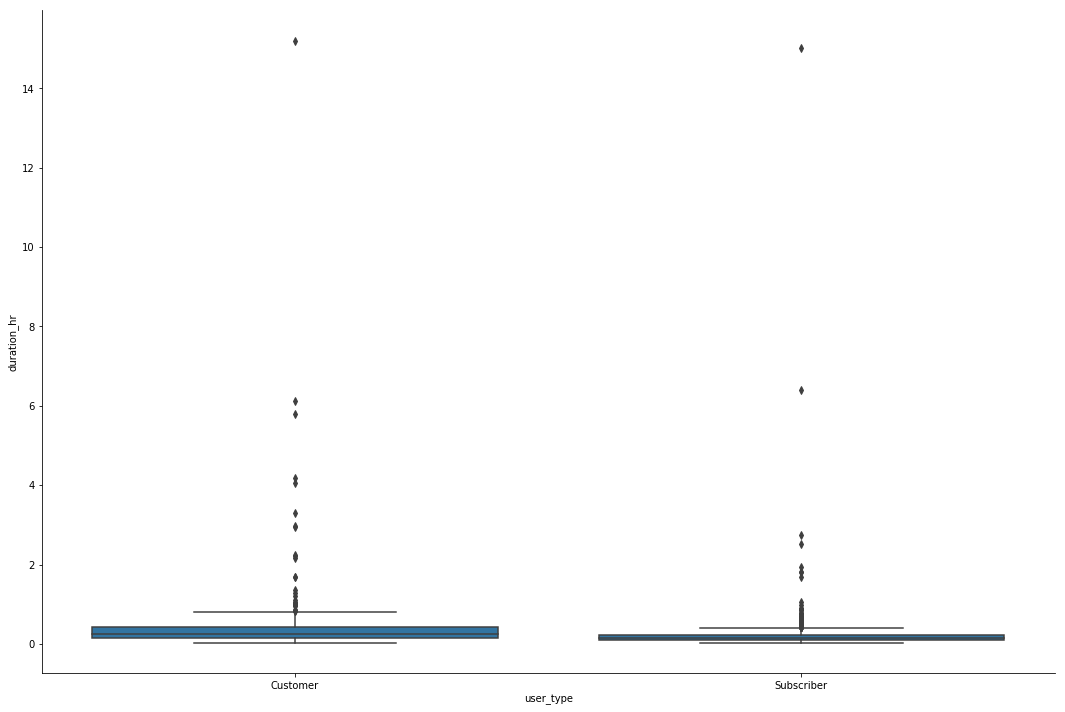

In [48]:
np.random.seed(2018)
samples = np.random.choice(bike_data.shape[0], 2000, replace = False)
bike_data_samp = bike_data.reindex(samples)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bike_data_samp, y_vars = 'duration_hr', x_vars = 'user_type',
                size = 10, aspect = 1.5)
g.map(boxgrid)
plt.show();

### Investigating the relation between the daywise usage of bike in minutes

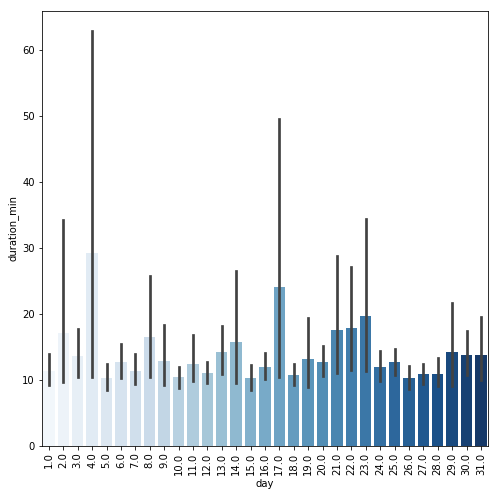

In [49]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])
sb.barplot(data = bike_data_samp, x = 'day', y = 'duration_min', palette = 'Blues')
plt.xticks(rotation=90)
plt.show()

### Investigating the relation between the month-wise usage of bike in minutes

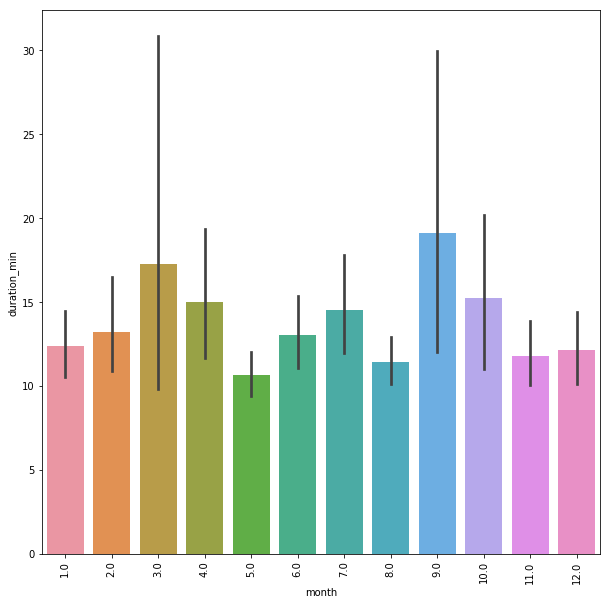

In [50]:
plt.figure(figsize = [10, 10])
#month_order=bike_data_samp['month'].value_counts.index
sb.barplot(data = bike_data_samp, x = 'month', y = 'duration_min')
plt.xticks(rotation=90)
plt.show()

In [51]:
#plt.scatter(data = bike_data_samp, x = 'start_station_id', y = 'end_station_id',c='duration_min', alpha = 1/10, cmap='viridis_r')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Yes. In the univariate exploration, the number of subscribers who used bikes were more than customers. However, in the bivariate exploration, the avearge time spent by customers were more than subscribers
> Another interesting feature, is the duration (in min) spent on the bike gradually reduces over the months
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Since most of the values are discrete in nature. I did not observer a correlation between the other features

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### We are trying to understand the relation between the month, time spent on bike and a day-wise view

In [52]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    #bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    #bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)
    #plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    #plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])), [500, '1k', '2k', '5k', '10k', '20k'])

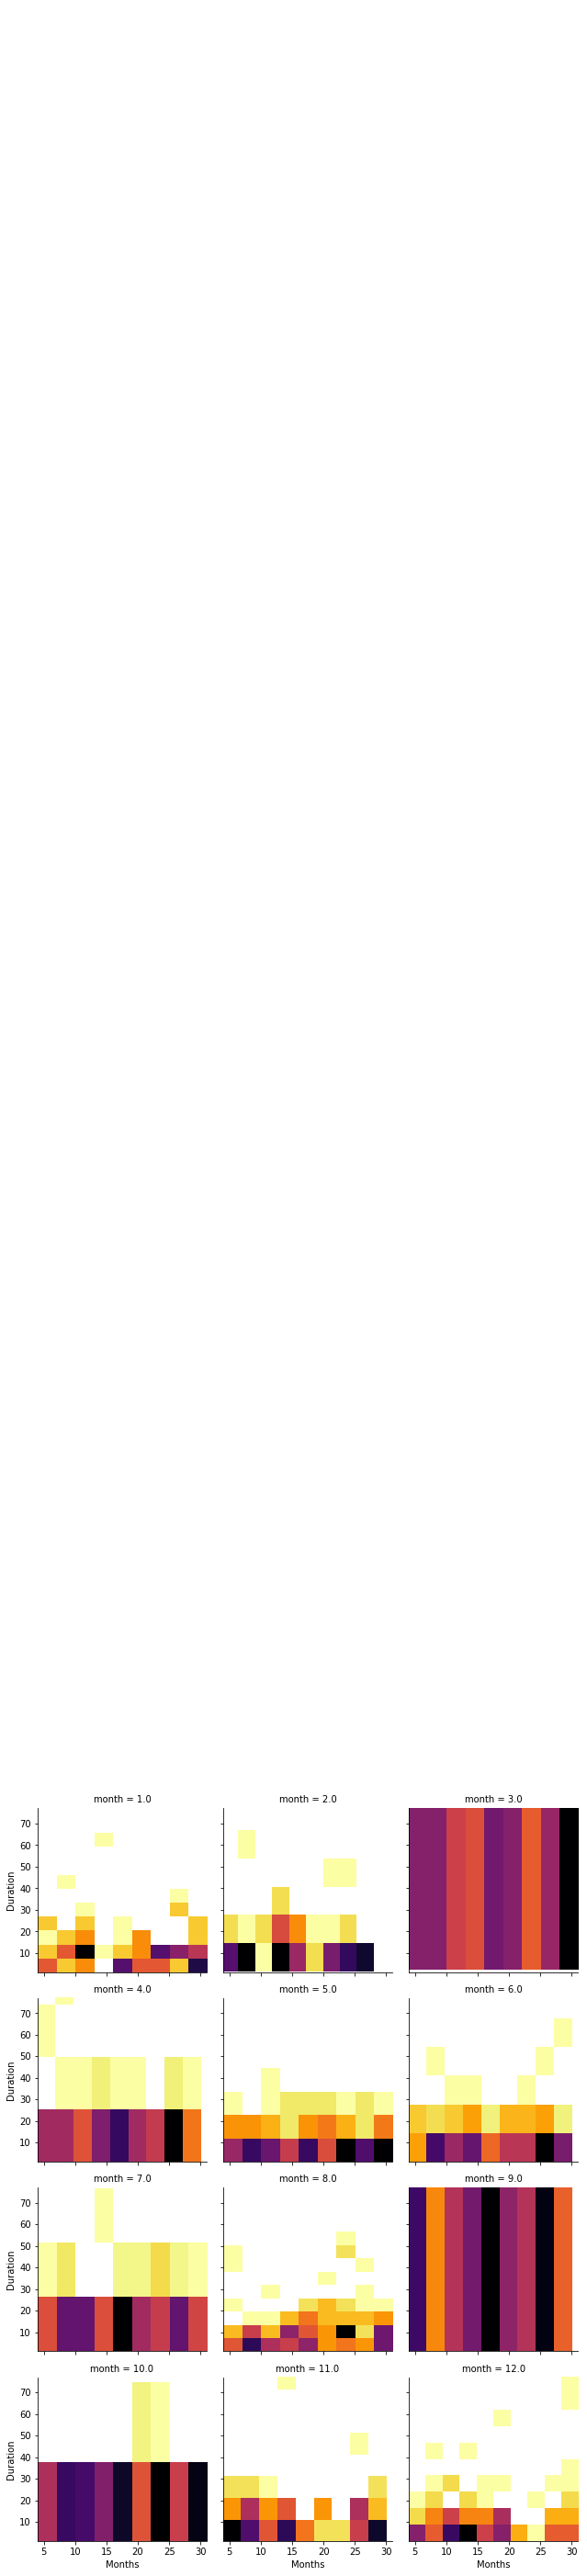

In [53]:
# create faceted heat maps on months of the year
g = sb.FacetGrid(data = bike_data_samp, col = 'month', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'day', 'duration_min', color = 'inferno_r')
g.set_xlabels('Months')
g.set_ylabels('Duration')

plt.show()

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


([<matplotlib.axis.XTick at 0x24d82efab38>,
 <a list of 31 Text xticklabel objects>)

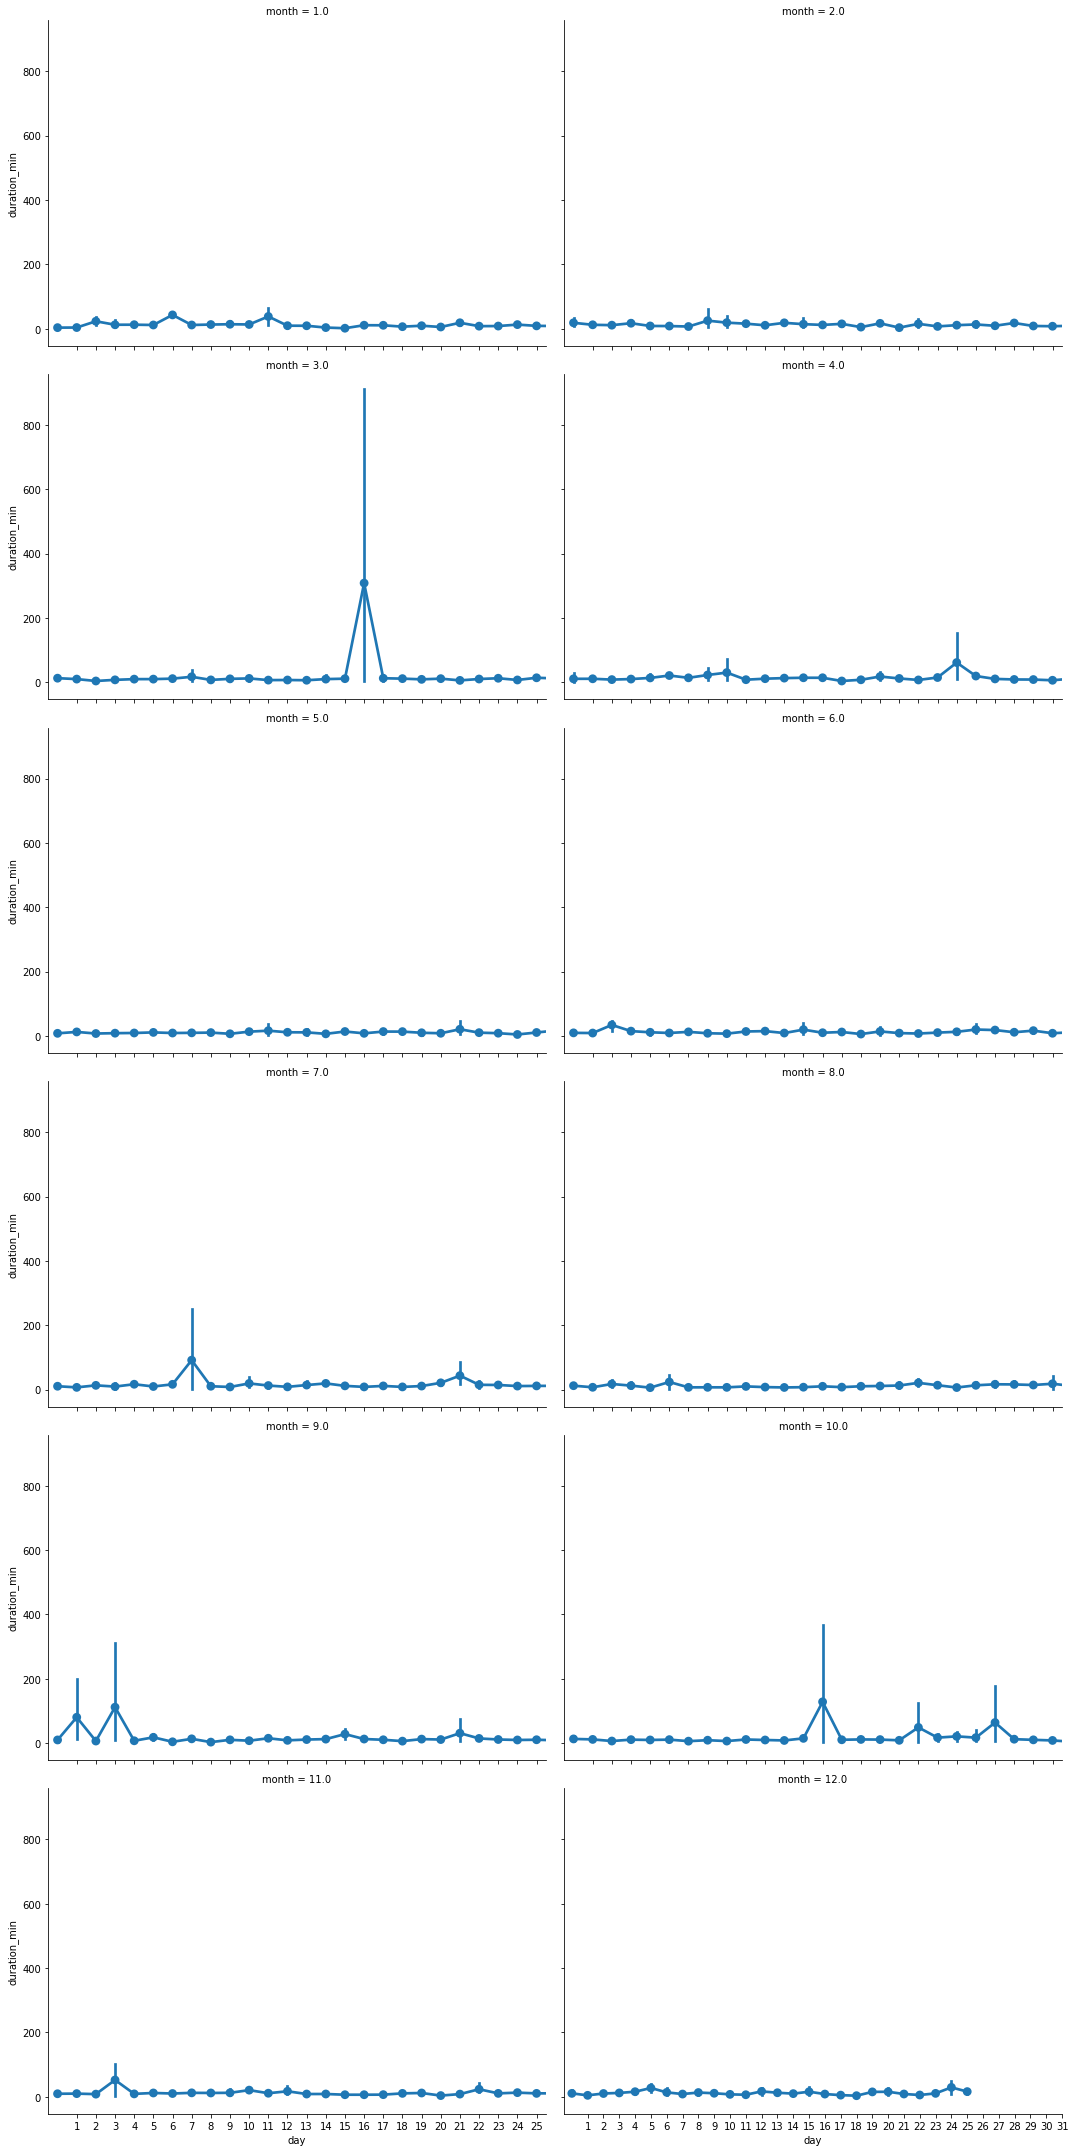

In [54]:
bin_edges = np.arange(0,31,1)
g=sb.FacetGrid(data=bike_data_samp, col='month', col_wrap=2, size=5,aspect = 1.5)
g.map(sb.pointplot,'day', 'duration_min')
#plt.xticks(rotation=90)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31], ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the bi-variate plot, we seen that month 3 and 9 show a spike in the time spent on bike. The plothist2D and the point plot drawn as part of mutivariate exploration indicate he sudden spikes are due to the large value of outliers. The outliers are represented as error bar in the point plot 

### Were there any interesting or surprising interactions between features?

> Since there is very less correlation between the variables as checked in hetmap in bivariate exploration. WEe dont see any interesting interaction 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!